# Seqeuncing

# Volcano plots

Setup

In [ ]:
# Always load same package versions
groundhog.day <- "2024-01-01"
groundhog::meta.groundhog(groundhog.day) 


Now using 'groundhog_3.1.2'.

here() starts at C:/Users/alosvendsen/Documents/R/manuscript

Successfully attached 'data.table_1.14.10'

Successfully attached 'readxl_1.4.3'

Successfully attached 'ggplot2_3.4.4'

Successfully attached 'ggrepel_0.9.4'

Successfully attached 'here_1.0.1'

## Pooled IL-6

No sig up or down regulated genes when pooling IL-6 10 and 0.1 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL6_vs_vehicle.xlsx")
il6_combined_data <- read_xlsx(file, sheet = 1)


setDT(il6_combined_data)
il6_combined_data[logCPM > 1 & logFC > 1 & FDR < 0.05]


Empty data.table (0 rows and 8 cols): matrixrow,ENSEMBL_ID,genes,logFC,logCPM,LR...

Empty data.table (0 rows and 8 cols): matrixrow,ENSEMBL_ID,genes,logFC,logCPM,LR...

As seen in empty dataframes there are no sig up or downregulated. Also seen in the volcano plot

In [ ]:
# Create a new column for labeling differential gene expression
il6_combined_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il6_combined_data$diffexpressed[il6_combined_data$logFC > 1 & il6_combined_data$FDR < 0.05 & il6_combined_data$logCPM > 1] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il6_combined_data$diffexpressed[il6_combined_data$logFC < -1 & il6_combined_data$FDR < 0.05 & il6_combined_data$logCPM > 1] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il6_combined_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il6_combined_data$delabel[il6_combined_data$diffexpressed != "NO"] <- il6_combined_data$genes[il6_combined_data$diffexpressed != "NO"]


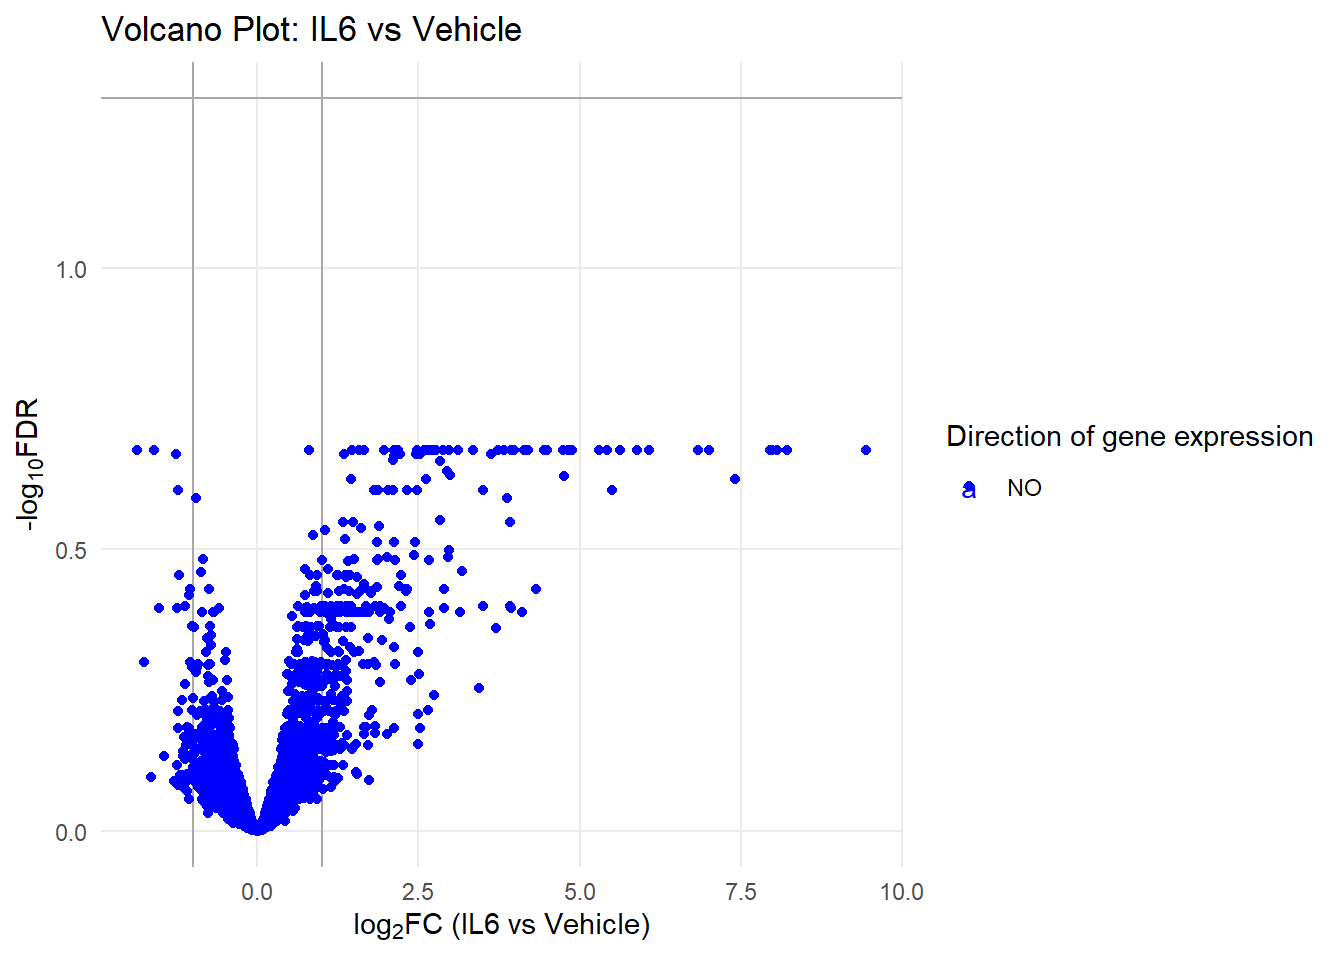

In [ ]:
# Create the volcano plot using ggplot2
plot_volcano_il6_combined <- 
  ggplot(data=il6_combined_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 7) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(breaks = seq(-11, 9, 2)) + # Customize x-axis breaks
    #scale_y_continuous(breaks = seq(0, 90, 10)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(), panel.grid.minor.x = element_blank())+ # Adjust minor grid lines
    ggtitle('Volcano Plot: IL6 vs Vehicle') # Add a title to the plot

plot_volcano_il6_combined


## IL-6 10 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL6_10_vs_vehicle.xlsx")
il6_10_data <- read_xlsx(file, sheet = 1)


increasing max.overlaps

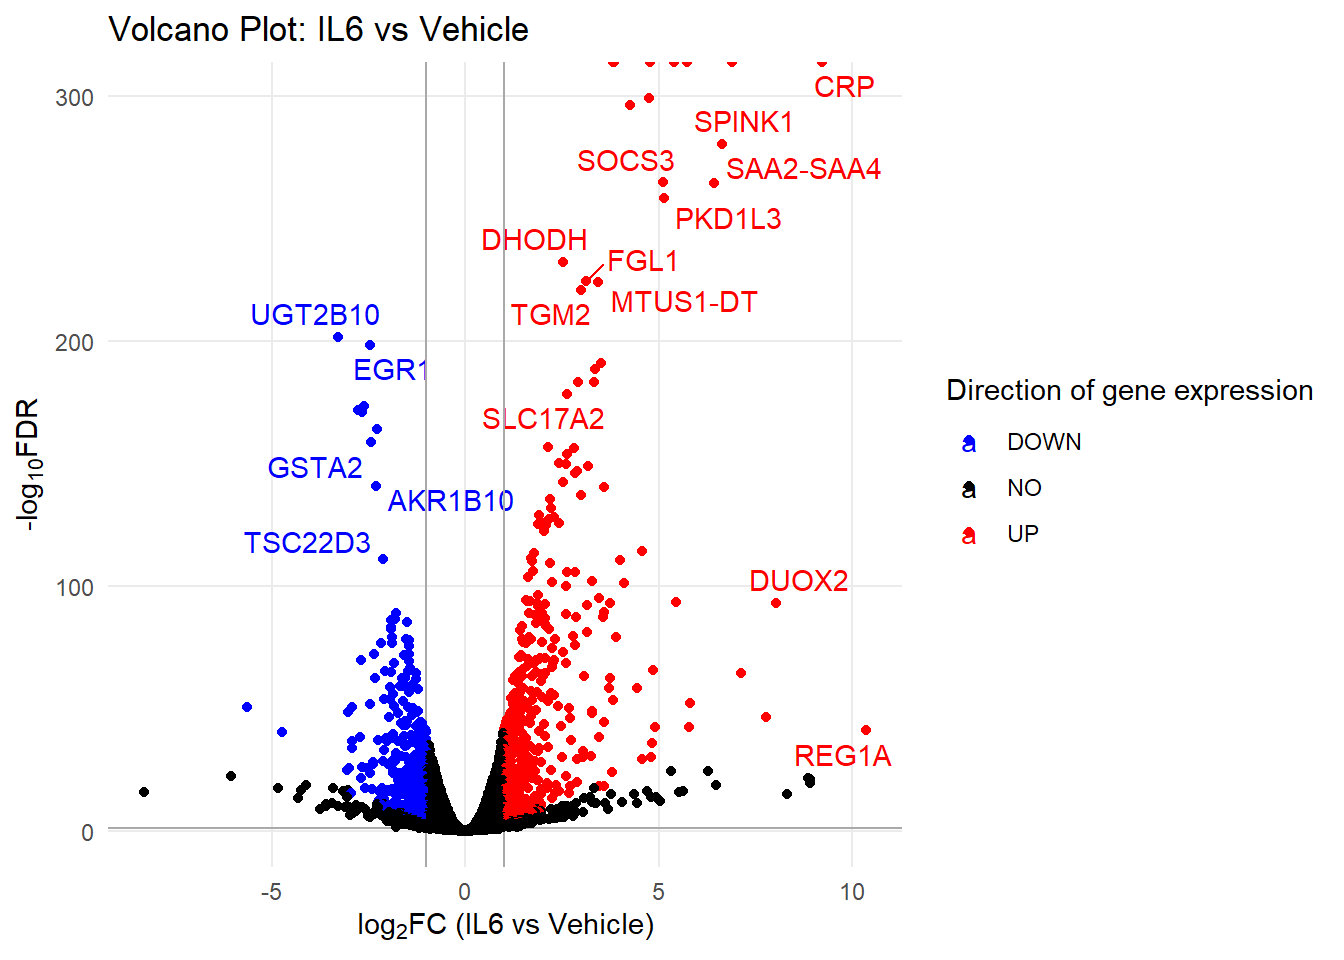

In [ ]:

# Create a new column for labeling differential gene expression
il6_10_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il6_10_data$diffexpressed[il6_10_data$logFC > 1 & il6_10_data$FDR < 0.05 & il6_10_data$logCPM > 1] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il6_10_data$diffexpressed[il6_10_data$logFC < -1 & il6_10_data$FDR < 0.05 & il6_10_data$logCPM > 1] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il6_10_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il6_10_data$delabel[il6_10_data$diffexpressed != "NO"] <- il6_10_data$genes[il6_10_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il6_10 <- 
  ggplot(data=il6_10_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 7) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(breaks = seq(-11, 9, 2)) + # Customize x-axis breaks
    #scale_y_continuous(breaks = seq(0, 90, 10)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(), panel.grid.minor.x = element_blank())+ # Adjust minor grid lines
    ggtitle('Volcano Plot: IL6 vs Vehicle') # Add a title to the plot


plot_volcano_il6_10
